In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, std_dev=0.8):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Load the original RGB image
original_image = cv2.imread('E:/IUT/Computer vision/EX2/1.jpg')
noisy_image = add_gaussian_noise(original_image)

In [11]:
# Denoising algorithms
denoised_gaussian = cv2.GaussianBlur(noisy_image, (15, 15), 0)
denoised_median = cv2.medianBlur(noisy_image, 5)
denoised_bilateral = cv2.bilateralFilter(noisy_image, 13, 200, 200)
denoised_nl_means = cv2.fastNlMeansDenoisingColored(noisy_image, None, 30, 30, 7, 21)

(-0.5, 999.5, 666.5, -0.5)

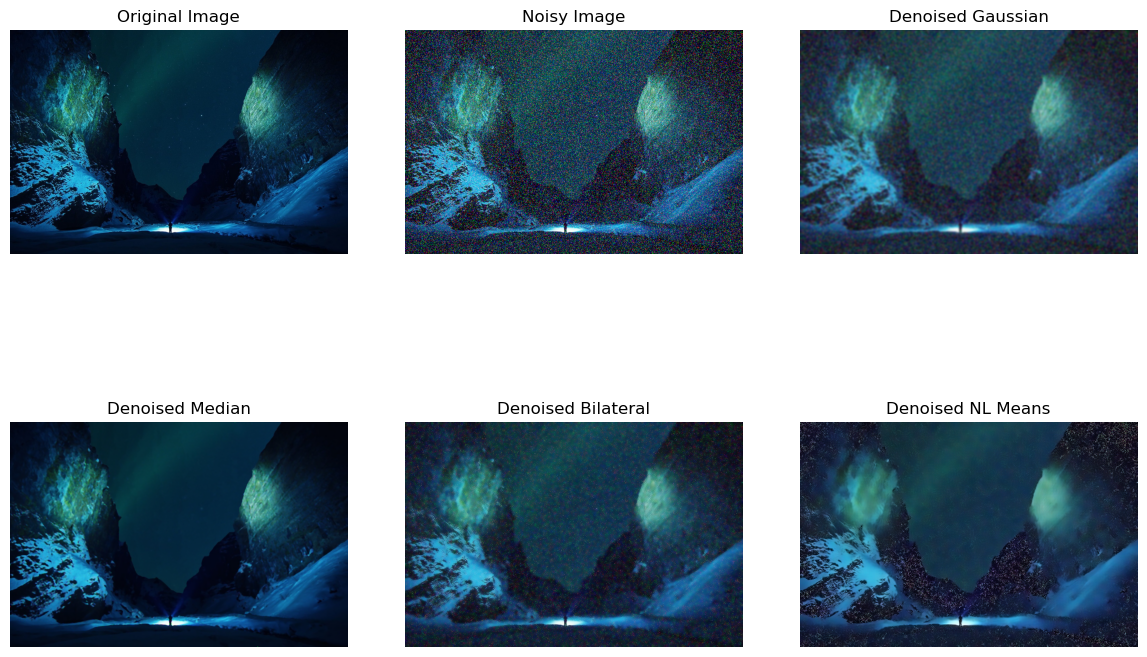

In [13]:
# Display the images using Matplotlib
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout()

axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Noisy Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(denoised_gaussian, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Denoised Gaussian')
axs[0, 2].axis('off')

axs[1, 0].imshow(cv2.cvtColor(denoised_median, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Denoised Median')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(denoised_bilateral, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Denoised Bilateral')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv2.cvtColor(denoised_nl_means, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('Denoised NL Means')
axs[1, 2].axis('off')

(-0.5, 999.5, 666.5, -0.5)

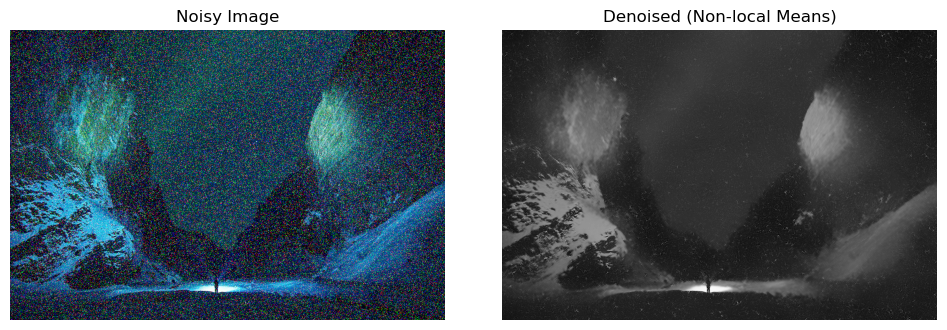

In [9]:
noisy_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

# Denoise using Non-local Means Denoising
denoised_nl_means = cv2.fastNlMeansDenoising(noisy_gray, h=30, templateWindowSize=7, searchWindowSize=50)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()

axs[0].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Noisy Image')
axs[0].axis('off')

axs[1].imshow(denoised_nl_means, cmap='gray')
axs[1].set_title('Denoised (Non-local Means)')
axs[1].axis('off')

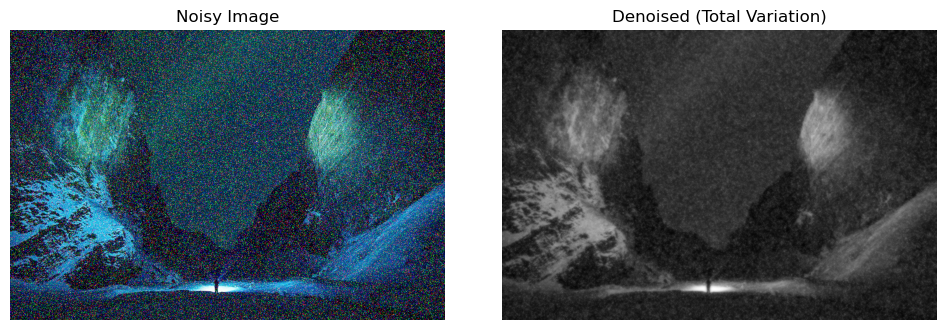

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def total_variation_denoising(image, weight=0.1, num_iterations=30):
    denoised_image = np.float64(image.copy())
    
    for _ in range(num_iterations):
        # Calculate gradients
        grad_x = cv2.Sobel(denoised_image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(denoised_image, cv2.CV_64F, 0, 1, ksize=3)
        
        # Calculate the divergence term using Laplacian
        div = cv2.Laplacian(denoised_image, cv2.CV_64F, ksize=3)
        
        # Update image using gradient descent
        denoised_image += weight * (div + image - denoised_image)
    
    return np.uint8(denoised_image)

# Load the noisy image
#noisy_image = cv2.imread('E:/IUT/Computer vision/EX2/1.jpg')

# Convert the image to grayscale
noisy_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

# Apply Total Variation denoising
denoised_tv = total_variation_denoising(noisy_gray, weight=0.1, num_iterations=100)

# Display the images using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()

axs[0].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Noisy Image')
axs[0].axis('off')

axs[1].imshow(denoised_tv, cmap='gray')
axs[1].set_title('Denoised (Total Variation)')
axs[1].axis('off')

plt.show()

In [1]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import torch
# # from skimage.metrics import peak_signal_noise_ratio

# # Load the noisy image
# noisy_image = cv2.imread('E:/IUT/Computer vision/EX2/1.jpg')

# # Convert the image to torch tensor and normalize
# noisy_tensor = torch.from_numpy(noisy_image.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

# # Define the denoising function using DIP
# def denoise_image_dip(image_tensor):
#     num_channels, height, width = image_tensor.shape[1:]
  
#     # Create a random image as the initialization
#     random_image = torch.randn(1, num_channels, height, width).float()

#     # Define the optimization criterion (MSE) and optimizer (Adam)
#     criterion = torch.nn.MSELoss()
#     optimizer = torch.optim.Adam([random_image], lr=0.01)

#     # Iteratively optimize the random image
#     num_iterations = 500
#     for i in range(num_iterations):
#         optimizer.zero_grad()

#         # Compute the loss (MSE between the random image and the noisy image)
#         loss = criterion(random_image, image_tensor)

#         # Backpropagate and update the random image
#         loss.backward()
#         optimizer.step()

#     return random_image
